Name Surname: Teoman Türkoğlu

Student No: 150200095

---

Libraries to be used

---

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Logistic Regression (35 points)

Logistic Regression with MSE Loss (5 points)

In [110]:
class LogisticRegressionMSE:
    def __init__(self, train_data, train_label, test_data, test_label, learning_rate=0.005, iterations=5000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.train_data = train_data
        self.train_label = train_label
        self.test_data = test_data
        self.test_label = test_label

        n_samples, n_features = self.train_data.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Compute accuracy of train and test data every 100 iterations during training
        self.accuracy_train_data_during_training = []
        self.accuracy_test_data_during_training = []

    def sigmoid(self, z):
        res = 1/(1 + np.exp(-z)) #sigmoid function is 1/(1+e^-x)
        return res

    def fit(self):
        m = self.train_data.shape[0] #get n_samples

        for i in range(self.iterations):
            #apply sigmoid function to the linear combination of weights and train data to predict
            y_pred = self.sigmoid(np.dot(self.train_data, self.weights) + self.bias)

            #compute the gradients using mean squared error loss function
            dw = (1/m) * np.dot(self.train_data.T, (y_pred - self.train_label) * y_pred * (1 - y_pred)) #with respect to weights
            db = (1/m) * np.sum((y_pred - self.train_label) * y_pred * (1 - y_pred)) #with respect to bias

            #update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            if i % 100 == 0: #compute accuracy of train and test data every 100 iterations

                #compute training accuracy by predicting train data then comparing with train labels
                train_pred_labels = (y_pred >= 0.5).astype(int)
                train_accuracy = accuracy_score(self.train_label, train_pred_labels)
                self.accuracy_train_data_during_training.append(train_accuracy)

                #compute test accuracy by predicting test data then comparing with test labels
                y_pred_test = self.sigmoid(np.dot(self.test_data , self.weights) + self.bias)
                test_pred_labels = (y_pred_test >= 0.5).astype(int)
                test_accuracy = accuracy_score(self.test_label, test_pred_labels)
                self.accuracy_test_data_during_training.append(test_accuracy)

                #print(f'Iteration {i}, Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}')


    def predict(self, test_data):
        #apply sigmoid function to the linear combination of weights and test data to predict
        y_pred = self.sigmoid(np.dot(test_data, self.weights) + self.bias)
        return np.where(y_pred >= 0.5, 1, 0) #return 1 if y_pred >= 0.5 else 0


Logistic Regression with Cross Entropy Loss (5 points)

In [111]:
class LogisticRegressionCrossEntropy:
    def __init__(self, train_data, train_label, test_data, test_label, learning_rate=0.005, iterations=5000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.train_data = train_data
        self.train_label = train_label
        self.test_data = test_data
        self.test_label = test_label

        n_samples, n_features = self.train_data.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Compute accuracy of train and test data every 100 iterations during training
        self.accuracy_train_data_during_training = []
        self.accuracy_test_data_during_training = []

    def sigmoid(self, z):
        res = 1/(1 + np.exp(-z)) #sigmoid function is 1/(1+e^-x)
        return res

    def fit(self):
        m = self.train_data.shape[0] #get n_samples

        for i in range(self.iterations):
            #apply sigmoid function to the linear combination of weights and train data to predict
            y_pred = self.sigmoid(np.dot(self.train_data, self.weights) + self.bias)

            #compute the gradients using cross entropy loss
            dw = (1/m) * np.dot(self.train_data.T, (y_pred - self.train_label)) #with respect to weights
            db = (1/m) * np.sum(y_pred - self.train_label) #with respect to bias

            #update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            if i % 100 == 0: #compute accuracy of train and test data every 100 iterations

                #compute training accuracy by predicting train data then comparing with train labels
                train_pred_labels = (y_pred >= 0.5).astype(int)
                train_accuracy = accuracy_score(self.train_label, train_pred_labels)
                self.accuracy_train_data_during_training.append(train_accuracy)

                #compute test accuracy by predicting test data then comparing with test labels
                y_pred_test = self.sigmoid(np.dot(self.test_data , self.weights) + self.bias)
                test_pred_labels = (y_pred_test >= 0.5).astype(int)
                test_accuracy = accuracy_score(self.test_label, test_pred_labels)
                self.accuracy_test_data_during_training.append(test_accuracy)

                #print(f'Iteration {i}, Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}')


    def predict(self, test_data):
        #apply sigmoid function to the linear combination of weights and test data to predict
        y_pred = self.sigmoid(np.dot(test_data, self.weights) + self.bias)
        return np.where(y_pred >= 0.5, 1, 0) #return 1 if y_pred >= 0.5 else 0

Validate your implementation using libraries (5 points)

(you can generate synthetic data using numpy of import another toy dataset from sklearn)


In [112]:
'''prepare data'''
np.random.seed(2)
n_samples = 1000
n_features = 2

X = np.random.randn(n_samples, n_features) + np.random.rand(n_samples, n_features) * 0.5
y = ((np.sin(X[:, 0]) + np.cos(X[:, 1])) > 0).astype(int) #nonlinear y function

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

'''Mean Squared Error'''
#instantiate and train the logistic regression model with mean squared error loss
mse = LogisticRegressionMSE(X_train, y_train, X_test, y_test)
mse.fit()

#predict using the mean squared error model
mse_pred = mse.predict(X_test)
mse_acc = accuracy_score(y_test, mse_pred)
print(f'MSE accuracy: {mse_acc}')

'''Cross Entropy'''
#instantiate and train the logistic regression model with cross entropy loss
ce = LogisticRegressionCrossEntropy(X_train, y_train, X_test, y_test)
ce.fit()

#predict using the cross entropy model
ce_pred = ce.predict(X_test)
ce_acc = accuracy_score(y_test, ce_pred)
print(f'Cross Entropy accuracy: {ce_acc}')

'''Library Model'''
#sklearn Logistic Regression for comparison
sklearn_model = LogisticRegression(max_iter = 500)
sklearn_model.fit(X_train, y_train)

#predict using the sklearn model
sklearn_predictions = sklearn_model.predict(X_test)
sklearn_accuracy = accuracy_score(y_test, sklearn_predictions)
print(f'Library Model Accuracy: {sklearn_accuracy}')

MSE accuracy: 0.86
Cross Entropy accuracy: 0.875
Library Model Accuracy: 0.89


#### Experiment

Dataset preparation

In [113]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

X = data[['Pclass', 'Sex', 'SibSp','Parch','Fare']].values
Y = data['Survived'].values
columns = data.columns

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Use two Logistic Regression Methods on the dataset directly (10 points)
Show accuracy scores on test data

In [114]:
'''Mean Squared Error'''
#instantiate and train the logistic regression model with mean squared error loss
mse = LogisticRegressionMSE(X_train, y_train, X_test, y_test)
mse.fit()

#predict using the mean squared error model
mse_pred = mse.predict(X_test)
mse_acc = accuracy_score(y_test, mse_pred)
print(f'MSE accuracy: {mse_acc}')

'''Cross Entropy'''
#instantiate and train the logistic regression model with cross entropy loss
ce = LogisticRegressionCrossEntropy(X_train, y_train, X_test, y_test)
ce.fit()

#predict using the cross entropy model
ce_pred = ce.predict(X_test)
ce_acc = accuracy_score(y_test, ce_pred)
print(f'Cross Entropy accuracy: {ce_acc}')

MSE accuracy: 0.7126865671641791
Cross Entropy accuracy: 0.7835820895522388


Plot the training and test accuracy across the learning iterations of gradient descent

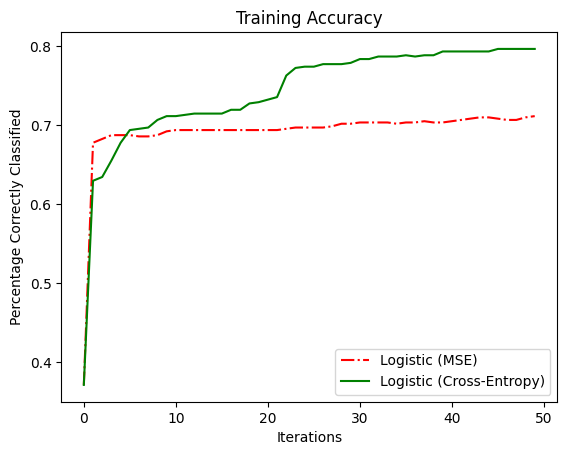

In [115]:
plt.xlabel('Iterations')
plt.ylabel('Percentage Correctly Classified')
plt.title('Training Accuracy')
plt.plot(mse.accuracy_train_data_during_training, 'r-.', label='Logistic (MSE)')
plt.plot(ce.accuracy_train_data_during_training, 'g-', label='Logistic (Cross-Entropy)')
plt.legend(loc='best')

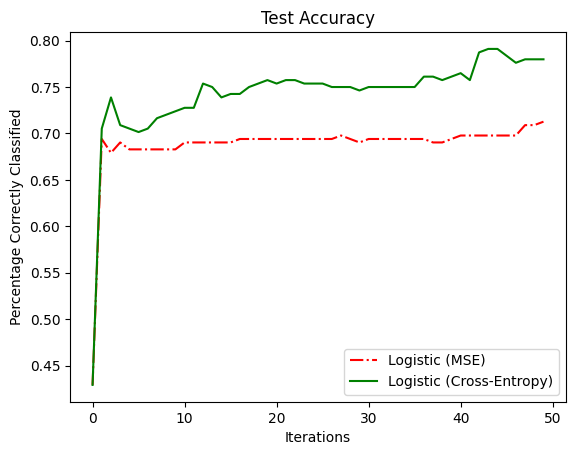

In [116]:
plt.xlabel('Iterations')
plt.ylabel('Percentage Correctly Classified')
plt.title('Test Accuracy')
plt.plot(mse.accuracy_test_data_during_training, 'r-.', label='Logistic (MSE)')
plt.plot(ce.accuracy_test_data_during_training, 'g-', label='Logistic (Cross-Entropy)')
plt.legend(loc='best')

Explain the differences between MSE and Cross Entropy Loss in logistic regression, why is one of the versions of Logistic Regression learning faster in terms of gradient descent iterations than the other? (5 points)

Answer: MSE is typically used for regression tasks and measures the average squared difference between the predicted values and the actual values. In the context of logistic regression, MSE calculates the difference between the predicted probabilities and the binary class labels (0 or 1). On the other hand, Cross Entropy Loss is specifically designed for classification tasks, particularly binary classification like logistic regression. It measures the distance between the predicted probability distribution and the true class distribution, focusing on how well the model predicts the correct class.

When it comes to the learning speed of these two loss functions in terms of gradient descent iterations, Cross Entropy Loss tends to result in faster convergence, as we can see on the plots. This is because it is more closely aligned with the probabilistic nature of logistic regression, providing gradients that directly correspond to the model's outputs. In contrast, MSE leads to slower learning because its gradient is less effective, especially when the predicted probabilities are close to 0 or 1. This can cause the optimization process to be less efficient, as the gradients become smaller in these regions, leading to slower progress in adjusting the model's parameters.

Show the plots demonstrating the effects of the learning rate and the number of iterations parameters on the training process (hyperparameter tuning) (5 points)

In [117]:
'''Mean Squared Error'''
#instantiate and train the logistic regression model with mean squared error loss
mse = LogisticRegressionMSE(X_train, y_train, X_test, y_test, learning_rate=0.005, iterations=5000)
mse.fit()

#predict using the mean squared error model
mse_pred = mse.predict(X_test)
mse_acc = accuracy_score(y_test, mse_pred)
print(f'MSE accuracy learning_rate=0.005: {mse_acc}')

#instantiate and train the logistic regression model with mean squared error loss
mse = LogisticRegressionMSE(X_train, y_train, X_test, y_test, learning_rate=0.01, iterations=5000)
mse.fit()

#predict using the mean squared error model
mse_pred = mse.predict(X_test)
mse_acc = accuracy_score(y_test, mse_pred)
print(f'MSE accuracy learning_rate=0.01: {mse_acc}')

#instantiate and train the logistic regression model with mean squared error loss
mse = LogisticRegressionMSE(X_train, y_train, X_test, y_test, learning_rate=0.02, iterations=5000)
mse.fit()

#predict using the mean squared error model
mse_pred = mse.predict(X_test)
mse_acc = accuracy_score(y_test, mse_pred)
print(f'MSE accuracy learning_rate=0.02: {mse_acc}')


#instantiate and train the logistic regression model with mean squared error loss
mse = LogisticRegressionMSE(X_train, y_train, X_test, y_test, learning_rate=0.005, iterations=5000)
mse.fit()

#predict using the mean squared error model
mse_pred = mse.predict(X_test)
mse_acc = accuracy_score(y_test, mse_pred)
print(f'\nMSE accuracy iterations=5000: {mse_acc}')

#instantiate and train the logistic regression model with mean squared error loss
mse = LogisticRegressionMSE(X_train, y_train, X_test, y_test, learning_rate=0.005, iterations=10000)
mse.fit()

#predict using the mean squared error model
mse_pred = mse.predict(X_test)
mse_acc = accuracy_score(y_test, mse_pred)
print(f'MSE accuracy iterations=10000: {mse_acc}')

#instantiate and train the logistic regression model with mean squared error loss
mse = LogisticRegressionMSE(X_train, y_train, X_test, y_test, learning_rate=0.005, iterations=20000)
mse.fit()

#predict using the mean squared error model
mse_pred = mse.predict(X_test)
mse_acc = accuracy_score(y_test, mse_pred)
print(f'MSE accuracy iterations=20000: {mse_acc}')

'''Cross Entropy'''
#instantiate and train the logistic regression model with cross entropy loss
ce = LogisticRegressionCrossEntropy(X_train, y_train, X_test, y_test, learning_rate=0.005, iterations=5000)
ce.fit()

#predict using the cross entropy model
ce_pred = ce.predict(X_test)
ce_acc = accuracy_score(y_test, ce_pred)
print(f'\nCross Entropy accuracy learning_rate=0.005: {ce_acc}')

#instantiate and train the logistic regression model with cross entropy loss
ce = LogisticRegressionCrossEntropy(X_train, y_train, X_test, y_test, learning_rate=0.01, iterations=5000)
ce.fit()

#predict using the cross entropy model
ce_pred = ce.predict(X_test)
ce_acc = accuracy_score(y_test, ce_pred)
print(f'Cross Entropy accuracy learning_rate=0.01: {ce_acc}')

#instantiate and train the logistic regression model with cross entropy loss
ce = LogisticRegressionCrossEntropy(X_train, y_train, X_test, y_test, learning_rate=0.02, iterations=5000)
ce.fit()

#predict using the cross entropy model
ce_pred = ce.predict(X_test)
ce_acc = accuracy_score(y_test, ce_pred)
print(f'Cross Entropy accuracy learning_rate=0.02: {ce_acc}')


#instantiate and train the logistic regression model with cross entropy loss
ce = LogisticRegressionCrossEntropy(X_train, y_train, X_test, y_test, learning_rate=0.005, iterations=5000)
ce.fit()

#predict using the cross entropy model
ce_pred = ce.predict(X_test)
ce_acc = accuracy_score(y_test, ce_pred)
print(f'\nCross Entropy accuracy iterations=5000: {ce_acc}')

#instantiate and train the logistic regression model with cross entropy loss
ce = LogisticRegressionCrossEntropy(X_train, y_train, X_test, y_test, learning_rate=0.005, iterations=10000)
ce.fit()

#predict using the cross entropy model
ce_pred = ce.predict(X_test)
ce_acc = accuracy_score(y_test, ce_pred)
print(f'Cross Entropy accuracy iterations=10000: {ce_acc}')

#instantiate and train the logistic regression model with cross entropy loss
ce = LogisticRegressionCrossEntropy(X_train, y_train, X_test, y_test, learning_rate=0.005, iterations=20000)
ce.fit()

#predict using the cross entropy model
ce_pred = ce.predict(X_test)
ce_acc = accuracy_score(y_test, ce_pred)
print(f'Cross Entropy accuracy iterations=20000: {ce_acc}')

MSE accuracy learning_rate=0.005: 0.7126865671641791
MSE accuracy learning_rate=0.01: 0.7686567164179104
MSE accuracy learning_rate=0.02: 0.7947761194029851

MSE accuracy iterations=5000: 0.7126865671641791
MSE accuracy iterations=10000: 0.7686567164179104
MSE accuracy iterations=20000: 0.7910447761194029

Cross Entropy accuracy learning_rate=0.005: 0.7835820895522388
Cross Entropy accuracy learning_rate=0.01: 0.8059701492537313
Cross Entropy accuracy learning_rate=0.02: 0.6902985074626866

Cross Entropy accuracy iterations=5000: 0.7835820895522388
Cross Entropy accuracy iterations=10000: 0.8022388059701493
Cross Entropy accuracy iterations=20000: 0.8059701492537313


#### Decision Tree (35 points)

Implement Decision Tree Method (5 points)

In [98]:
class DecisionTree:
    def __init__(self, columns, depth=None):
        self.max_depth = depth
        self.columns = columns

    def fit(self, train_data, train_label):
        def entropy(y): #calculate entropy to determine the best split
            counts = np.unique(y, return_counts=True)[1]
            probabilities = counts / len(y) #probability of each class
            return -np.sum(probabilities * np.log2(probabilities))

        def information_gain(y, left_y, right_y): #calculate information gain from a split
            p = len(left_y) / len(y) #probability of left split
            return entropy(y) - p * entropy(left_y) - (1 - p) * entropy(right_y)

        def split_data(X, y, feature_idx, threshold): #split data based on a feature and threshold
            left_mask = X[:, feature_idx] <= threshold #create a mask for left split
            right_mask = ~left_mask #create a mask for right split
            return X[left_mask], y[left_mask], X[right_mask], y[right_mask] #return left and right split data

        def build_tree(X, y, depth=0): #recursive function to build the tree
            num_samples, num_features = X.shape

            #check if the node is a leaf node
            if len(np.unique(y)) == 1 or depth == self.max_depth or num_samples == 0:
                leaf_value = np.bincount(y).argmax()
                return {"leaf": True, "value": leaf_value}

            best_feature, best_threshold, best_gain = None, None, -np.inf #initialize vars

            for feature_idx in range(num_features):
                thresholds = np.unique(X[:, feature_idx]) #get unique values for each feature

                for threshold in thresholds:
                    X_left, y_left, X_right, y_right = split_data(X, y, feature_idx, threshold)
                    if len(y_left) == 0 or len(y_right) == 0: #skip if no split
                        continue

                    gain = information_gain(y, y_left, y_right)
                    if gain > best_gain: #update best gain if current gain is higher
                        best_feature, best_threshold, best_gain = feature_idx, threshold, gain

            if best_gain == 0: #if no gain, return a leaf node
                leaf_value = np.bincount(y).argmax()
                return {"leaf": True, "value": leaf_value}

            #split data based on best feature and threshold
            X_left, y_left, X_right, y_right = split_data(X, y, best_feature, best_threshold)
            left_child = build_tree(X_left, y_left, depth + 1) #recursively build left subtree
            right_child = build_tree(X_right, y_right, depth + 1) #recursively build right subtree

            return { #return internal node
                "leaf": False,
                "feature": best_feature,
                "threshold": best_threshold,
                "left": left_child,
                "right": right_child,
            }

        self.root = build_tree(train_data, train_label) #build the tree to train the model

    def predict(self, test_data): #predict using the trained model
        def traverse_tree(x, node): #recursive function to traverse the tree
            if node["leaf"]: #return the value if it is a leaf node
                return node["value"]

            #traverse left subtree if feature value is less than threshold
            if x[node["feature"]] <= node["threshold"]:
                return traverse_tree(x, node["left"])

            else: #traverse right subtree if feature value is greater than threshold
                return traverse_tree(x, node["right"])

        #predict by traversing the tree for each test data
        return np.array([traverse_tree(x, self.root) for x in test_data])

    def print_tree(self):
        def traverse(node, depth=0): #preorder traversal for print function
            if node["leaf"]: #leaf nodes should be printed as Left/Right Leaf: label value
                print("\t" * depth + f"Leaf: {node['value']}") #an extra tab for each depth level
                return

            #internal nodes should be printed as feature_name <= threshold value
            print("\t" * depth + f"{self.columns[node['feature']]} <= {node['threshold']}")

            traverse(node["left"], depth + 1)
            traverse(node["right"], depth + 1)

        traverse(self.root)

Validate your implementation using libraries (5 points)

(you can generate synthetic data using numpy of import another toy dataset from sklearn)


In [99]:
'''prepare data'''
np.random.seed(42)
n_samples = 1000
n_features = 2

X = np.random.randn(n_samples, n_features) + np.random.rand(n_samples, n_features) * 0.5
y = ((np.sin(X[:, 0]) + np.cos(X[:, 1])) > 0).astype(int) #nonlinear y function

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

'''Decision Tree'''
#instantiate and train the decision tree model
dt = DecisionTree(columns=['feature1', 'feature2'], depth=3)
dt.fit(X_train, y_train)

#predict using the decision tree model
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print(f'Implemented Decision Tree accuracy: {dt_acc}')

'''Library Model'''
#sklearn Decision Tree for comparison
sklearn_model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
sklearn_model.fit(X_train, y_train)

#predict using the sklearn model
sklearn_predictions = sklearn_model.predict(X_test)
sklearn_accuracy = accuracy_score(y_test, sklearn_predictions)
print(f'Library Model Accuracy: {sklearn_accuracy}')

Implemented Decision Tree accuracy: 0.935
Library Model Accuracy: 0.94


#### Experiment

Dataset preparation

In [100]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

X = data[['Pclass', 'Sex', 'SibSp','Parch','Fare']].values
Y = data['Survived'].values
columns = data.columns

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Use Decision Tree Method on the dataset directly (10 points)
Show accuracy score on test data

In [101]:
'''Decision Tree'''
#instantiate and train the decision tree model
dt = DecisionTree(columns=['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare'], depth=3)
dt.fit(X_train, y_train)

#predict using the decision tree model
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print(f'Implemented Decision Tree accuracy: {dt_acc}')

Implemented Decision Tree accuracy: 0.8097014925373134


Print the decision tree (5 points)

In [102]:
dt.print_tree()

Sex <= 0.0
	Fare <= 15.5
		Parch <= 0.0
			Leaf: 0
			Leaf: 0
		SibSp <= 2.0
			Leaf: 0
			Leaf: 0
	Pclass <= 2.0
		Fare <= 146.5208
			Leaf: 1
			Leaf: 1
		Fare <= 23.25
			Leaf: 1
			Leaf: 0


Show the impact of the max_depth hyperparameter on the accuracy score (hyperparameter tuning) (5 points)

In [105]:
'''max depth 2'''
#instantiate and train the decision tree model
dt = DecisionTree(columns=['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare'], depth=2)
dt.fit(X_train, y_train)

#predict using the decision tree model
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print(f'Implemented Decision Tree accuracy with max_depth = 2: {dt_acc}')

'''max depth 3'''
#instantiate and train the decision tree model
dt = DecisionTree(columns=['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare'], depth=3)
dt.fit(X_train, y_train)

#predict using the decision tree model
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print(f'Implemented Decision Tree accuracy with max_depth = 3: {dt_acc}')

'''max depth 4'''
#instantiate and train the decision tree model
dt = DecisionTree(columns=['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare'], depth=4)
dt.fit(X_train, y_train)

#predict using the decision tree model
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print(f'Implemented Decision Tree accuracy with max_depth = 4: {dt_acc}')

'''max depth 5'''
#instantiate and train the decision tree model
dt = DecisionTree(columns=['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare'], depth=5)
dt.fit(X_train, y_train)

#predict using the decision tree model
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print(f'Implemented Decision Tree accuracy with max_depth = 5: {dt_acc}')

Implemented Decision Tree accuracy with max_depth = 2: 0.7723880597014925
Implemented Decision Tree accuracy with max_depth = 3: 0.8097014925373134
Implemented Decision Tree accuracy with max_depth = 4: 0.7723880597014925
Implemented Decision Tree accuracy with max_depth = 5: 0.7761194029850746


In [106]:
iris = load_iris()
X = iris['data']
Y = iris['target']
columns = iris['feature_names']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Show your implementation on different dataset (5 points)

In [107]:
'''Decision Tree'''
#instantiate and train the decision tree model
dt = DecisionTree(columns=columns, depth=3)
dt.fit(X_train, y_train)

#predict using the decision tree model
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print(f'Implemented Decision Tree accuracy: {dt_acc}')

Implemented Decision Tree accuracy: 0.9333333333333333
